In [4]:
import torch
import numpy as np
from scipy import constants

import sys
sys.path.append('../')

from data_module.MarshalSigns import *
from data_module.MarshalSignsJIT import *

signals = ['none', 'emergency_stop', 'move_ahead', 'move_back_v1', 'move_back_v2', 'slow_down', 'start_engines', 'stop_engines', 'straight_ahead', 'turn_left', 'turn_right']
frame_limit = 5 # 1 frame has 192 chirps with spans 1.3ms
rad_file = '../radar8Ghz-DVS-marshaling_signals_20220421_rad/holst_foyer/capture-move_ahead-leon/foyer-move_ahead-150-cm-ofxRadar8Ghz_2022-04-21_19-43-20.rad'
rad_file = '../radar8Ghz-DVS-marshaling_signals_20220421_rad/holst_foyer/capture-move_ahead-leon/foyer-move_ahead-400-cm-ofxRadar8Ghz_2022-04-21_19-47-19.rad'

rad_files = []
data_dir = "../radar8Ghz-DVS-marshaling_signals_20220421_rad"
for rad_file in glob.glob(data_dir + '/**/*.rad', recursive=True):
    rad_files.append(rad_file)
#     print(rad_file)

for rad_file in rad_files:
    # file = file.tobytes()
    rad = RadarFileParser(rad_file, read_radar = True, read_dvs=False)
    print("chirps per frame:",rad.num_chirps_per_frame)
    print("number of samples per chirp:",rad.num_samples_per_chirp)
    print("length radar frames:",len(rad.radar_frames))
    print("frame limit:",frame_limit)
    nr_chunks = int(len(rad.radar_frames) / frame_limit)
    print("number of chunks:",nr_chunks)
    indices = [(rad_file, i) for i in range(0, nr_chunks)]
    # print(indices)


    room_dir, person_dir, filename = rad_file.split(os.sep)[-3:]
#     print("room_dir:\t",room_dir)
#     print("person_dir:\t",person_dir)
#     print("filename:\t",filename)
    person = person_dir.split('-')[-1] # remove person for publication, I guess?
#     print(person)
    room, signal, distance, distance_unit, *rest = filename.split('-')
#     print(room)
#     print(signal)
#     print(distance)
    group = '-'.join([signal, distance])

    description = '-'.join([room, signal, distance, distance_unit, person]) 

    full_labels = [f"{description}_{i}" for i in range(0, nr_chunks)]
    # print(full_labels)
    labels = [signals.index(signal) for i in range(0, nr_chunks)]
#     print(labels)
    groups = [group for i in range(0)]
    indices = [(rad_file, i) for i in range(0, nr_chunks)]
#     print(indices[0][0] == indices[1][0])
#     print(indices[1][0])
#     print(len(indices))

chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar frames: 150
frame limit: 5
number of chunks: 30
chirps per frame: 192
number of samples per chirp: 512
length radar fram

ValueError: 'mixed' is not in list

## Making distirbutions of the data

In [14]:
import torch
import numpy as np

import pickle
import sys
sys.path.append('../')

#Custom made modules
from data_module.MarshalSimple import DataModuleRadarDynamicPreprocessing, DataSetRadarDynamicPreprocessing
from processing.parallelized_preprocessing import *

from sklearn.metrics import confusion_matrix

from tqdm import tqdm, trange
from configurations_grid import *

# Create datasets and dataloaders
data_dir = '../data/radar8Ghz-DVS-marshaling_signals_20220901_publication_anonymized/train'


In [15]:
def generate_dataset_module():
    return DataModuleRadarDynamicPreprocessing(data_dir, frame_limit)

datasetmodule = generate_dataset_module()

Found radar sequences: 523


Parsing Files: 100%|██████████████████████████| 523/523 [00:21<00:00, 24.14it/s]


Undersampling dataset to balance...
Original dataset shape Counter({0: 2160, 8: 1110, 5: 1080, 2: 1060, 10: 1050, 3: 1020, 4: 960, 6: 960, 7: 960, 9: 960, 1: 960})
Sampling strategy: {0: 960, 1: 960, 2: 960, 3: 960, 4: 960, 5: 960, 6: 960, 7: 960, 8: 960, 9: 960, 10: 960}
Resampled dataset shape Counter({0: 960, 1: 960, 2: 960, 3: 960, 4: 960, 5: 960, 6: 960, 7: 960, 8: 960, 9: 960, 10: 960})
Number of samples lenght leave one out two fold train: 10560, 10560
Number of samples lenght leave one out two fold valid: 0, 0


In [16]:
print(datasetmodule.data_as_df)

                                                 indices  labels  \
0      rad_file:../data/radar8Ghz-DVS-marshaling_sign...       0   
1      rad_file:../data/radar8Ghz-DVS-marshaling_sign...       0   
2      rad_file:../data/radar8Ghz-DVS-marshaling_sign...       0   
3      rad_file:../data/radar8Ghz-DVS-marshaling_sign...       0   
4      rad_file:../data/radar8Ghz-DVS-marshaling_sign...       0   
...                                                  ...     ...   
10555  rad_file:../data/radar8Ghz-DVS-marshaling_sign...      10   
10556  rad_file:../data/radar8Ghz-DVS-marshaling_sign...      10   
10557  rad_file:../data/radar8Ghz-DVS-marshaling_sign...      10   
10558  rad_file:../data/radar8Ghz-DVS-marshaling_sign...      10   
10559  rad_file:../data/radar8Ghz-DVS-marshaling_sign...      10   

                                             full_labels          groups  \
0          conference_room-none-xxx-2022-02-17-04-58-2_9        none-xxx   
1             foyer-none-xxx-20

In [17]:
import pandas as pd
from IPython.display import FileLink
import seaborn as sns

df = datasetmodule.data_as_df
df.to_csv('datasetmodule_data_as_df.csv', index = False)
FileLink('datasetmodule_data_as_df.csv')

/home/tue/20204239/77ghzradarpipeline/marshalling/exploration_notebooks/datasetmodule_data_as_df.csv

In [18]:
labels_mapping = {
    0: 'none',
    1: 'emergency_stop',
    2: 'move_ahead',
    3: 'move_back_v1',
    4: 'move_back_v2',
    5: 'slow_down',
    6: 'start_engines',
    7: 'stop_engines',
    8: 'straight_ahead',
    9: 'turn_left',
    10: 'turn_right'
}

/tmp/20204239.22044/ipykernel_1994175/368683312.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
/home/tue/20204239/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tue/20204239/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tue/20204239/.local/lib/python3.10/si

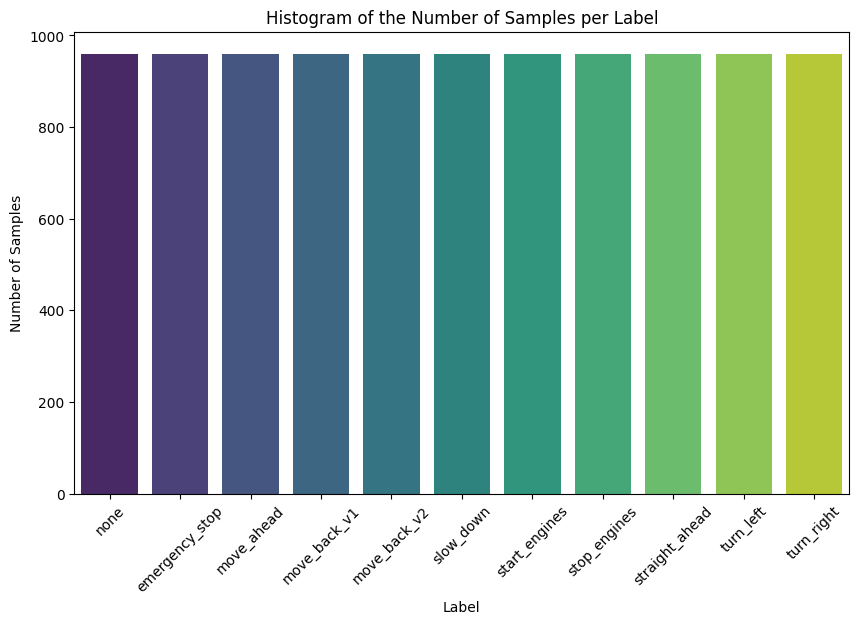

(10560, 6)


In [20]:
# Counting the occurrences of each label
df['labels'] = df['labels'].map(labels_mapping)
label_counts = df['labels'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.title("Histogram of the Number of Samples per Label")
plt.xticks(rotation=45)
plt.show()
print(df.shape)

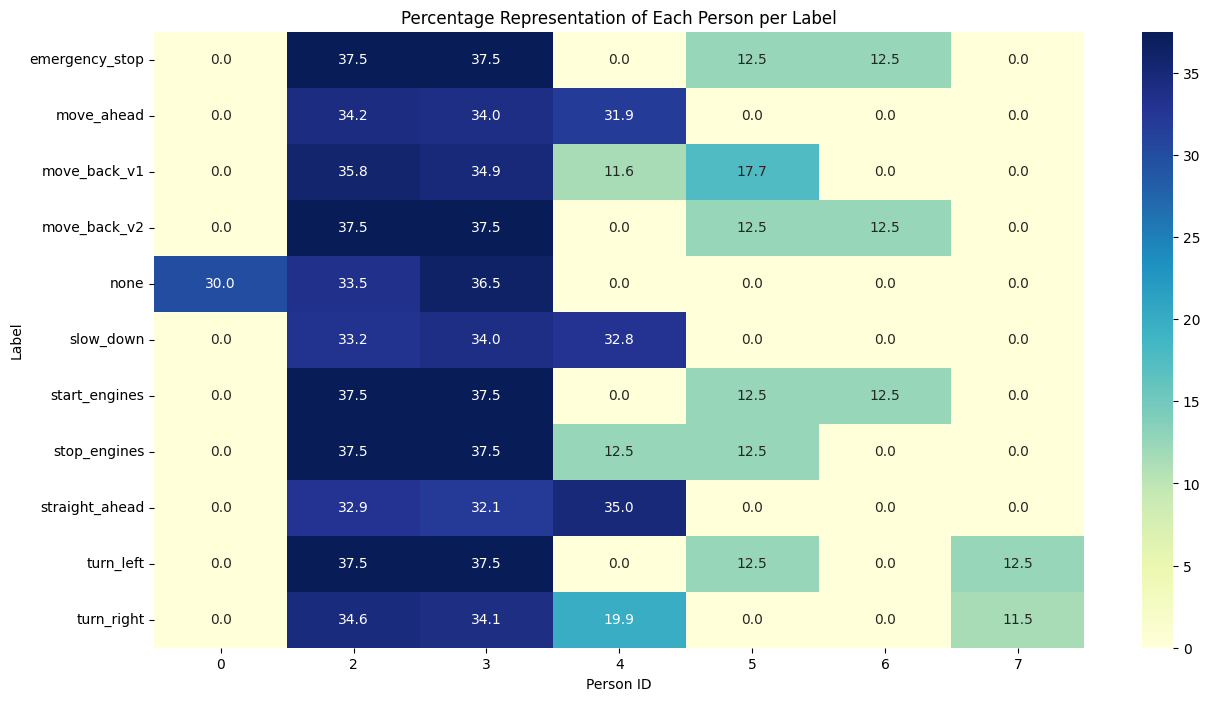

In [21]:
# Calculate the percentage representation of each person per label
person_label_percentage = df.groupby('labels')['person_ids'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting the percentage representation
plt.figure(figsize=(15, 8))
sns.heatmap(person_label_percentage, annot=True, cmap="YlGnBu", fmt=".1f")
plt.xlabel("Person ID")
plt.ylabel("Label")
plt.yticks(rotation=0)  # to keep the labels upright
plt.title("Percentage Representation of Each Person per Label")
plt.savefig('./percentage_each_person_per_label.png')
plt.show()

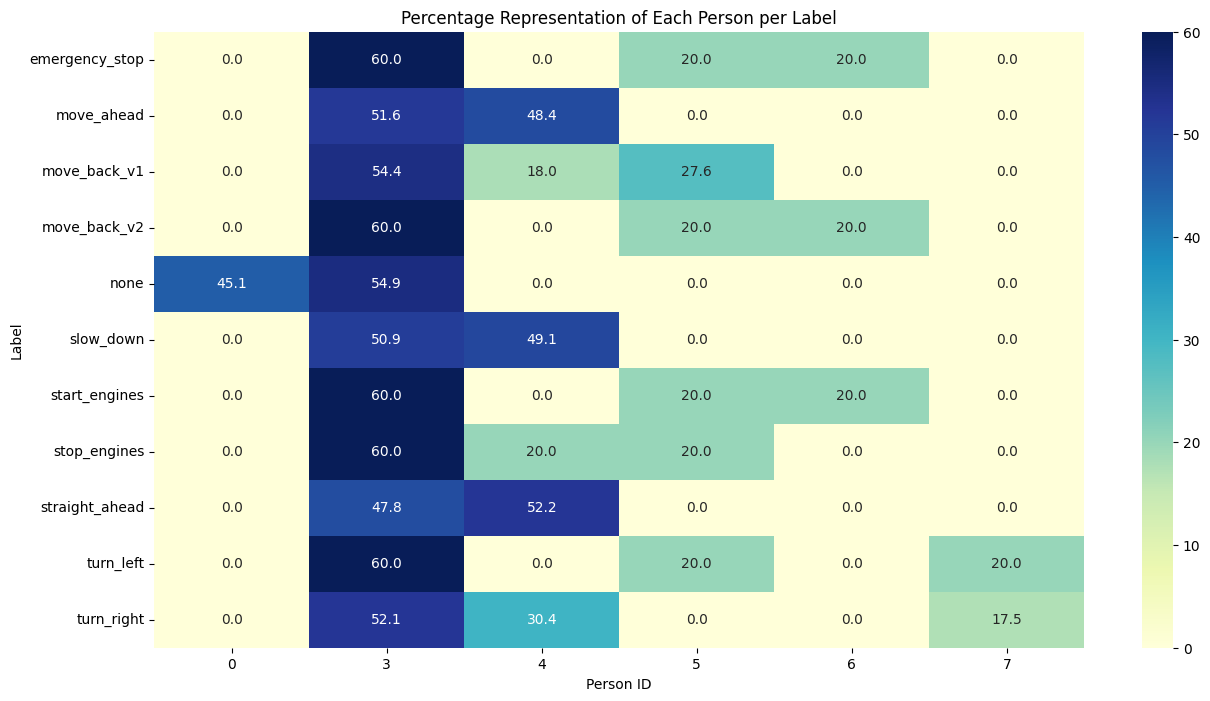

(6799, 6)
labels
straight_ahead    644
slow_down         641
none              638
move_ahead        632
turn_right        628
move_back_v1      616
emergency_stop    600
start_engines     600
move_back_v2      600
stop_engines      600
turn_left         600
Name: count, dtype: int64
labels
emergency_stop    360
start_engines     360
move_back_v2      360
turn_left         360
stop_engines      360
move_back_v1      344
turn_right        332
move_ahead        328
none              322
slow_down         319
straight_ahead    316
Name: count, dtype: int64


In [23]:
df_without_leon = df[~df['person_ids'].str.contains('2')]
df_leon_only = df[df['person_ids'].str.contains('2')]

# Calculate the percentage representation of each person per label
person_label_percentage = df_without_leon.groupby('labels')['person_ids'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting the percentage representation
plt.figure(figsize=(15, 8))
sns.heatmap(person_label_percentage, annot=True, cmap="YlGnBu", fmt=".1f")
plt.xlabel("Person ID")
plt.ylabel("Label")
plt.yticks(rotation=0)  # to keep the labels upright
plt.title("Percentage Representation of Each Person per Label")
plt.savefig('./percentage_each_person_per_label.png')
plt.show()
print(df_without_leon.shape)

print(df_without_leon['labels'].value_counts())
print(df_leon_only['labels'].value_counts())

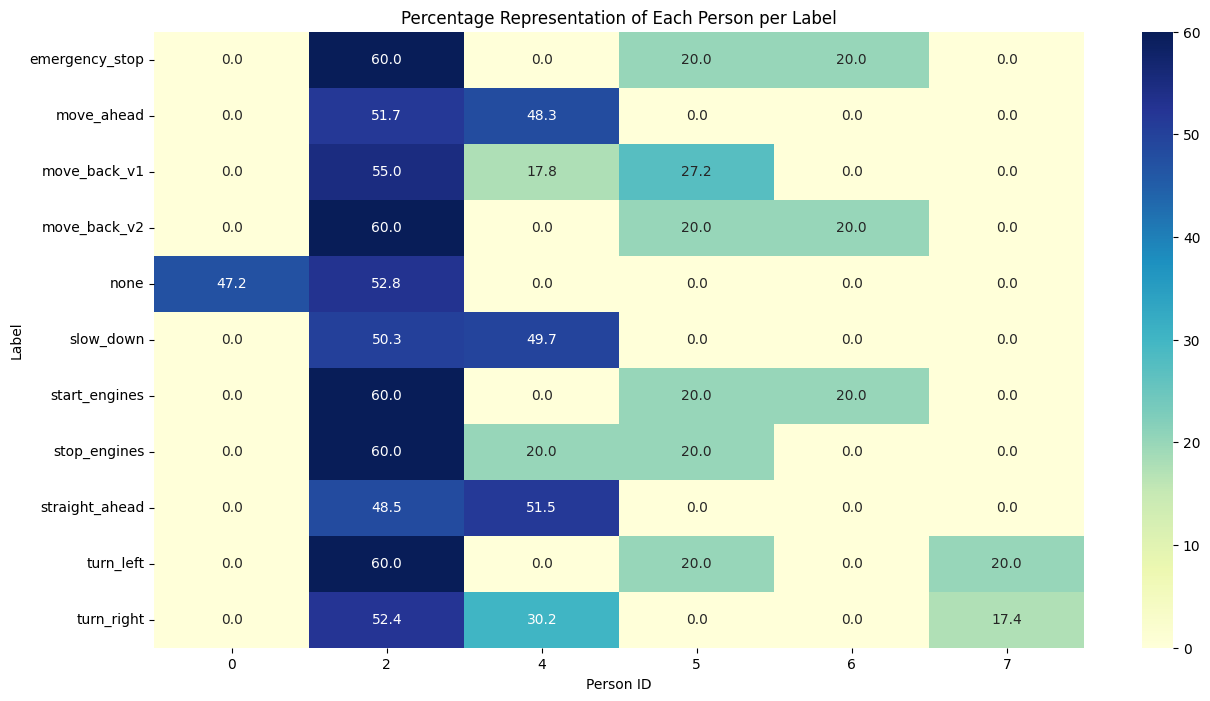

(6788, 6)
labels
straight_ahead    652
slow_down         634
move_ahead        634
turn_right        633
move_back_v1      625
none              610
emergency_stop    600
start_engines     600
move_back_v2      600
stop_engines      600
turn_left         600
Name: count, dtype: int64
labels
emergency_stop    360
start_engines     360
move_back_v2      360
turn_left         360
stop_engines      360
none              350
move_back_v1      335
turn_right        327
move_ahead        326
slow_down         326
straight_ahead    308
Name: count, dtype: int64


In [24]:
df_without_omar = df[~df['person_ids'].str.contains('3')]
df_omar_only = df[df['person_ids'].str.contains('3')]

# Calculate the percentage representation of each person per label
person_label_percentage = df_without_omar.groupby('labels')['person_ids'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting the percentage representation
plt.figure(figsize=(15, 8))
sns.heatmap(person_label_percentage, annot=True, cmap="YlGnBu", fmt=".1f")
plt.xlabel("Person ID")
plt.ylabel("Label")
plt.yticks(rotation=0)  # to keep the labels upright
plt.title("Percentage Representation of Each Person per Label")
plt.savefig('./percentage_each_person_per_label.png')
plt.show()

print(df_without_omar.shape)
print(df_without_omar['labels'].value_counts())
print(df_omar_only['labels'].value_counts())


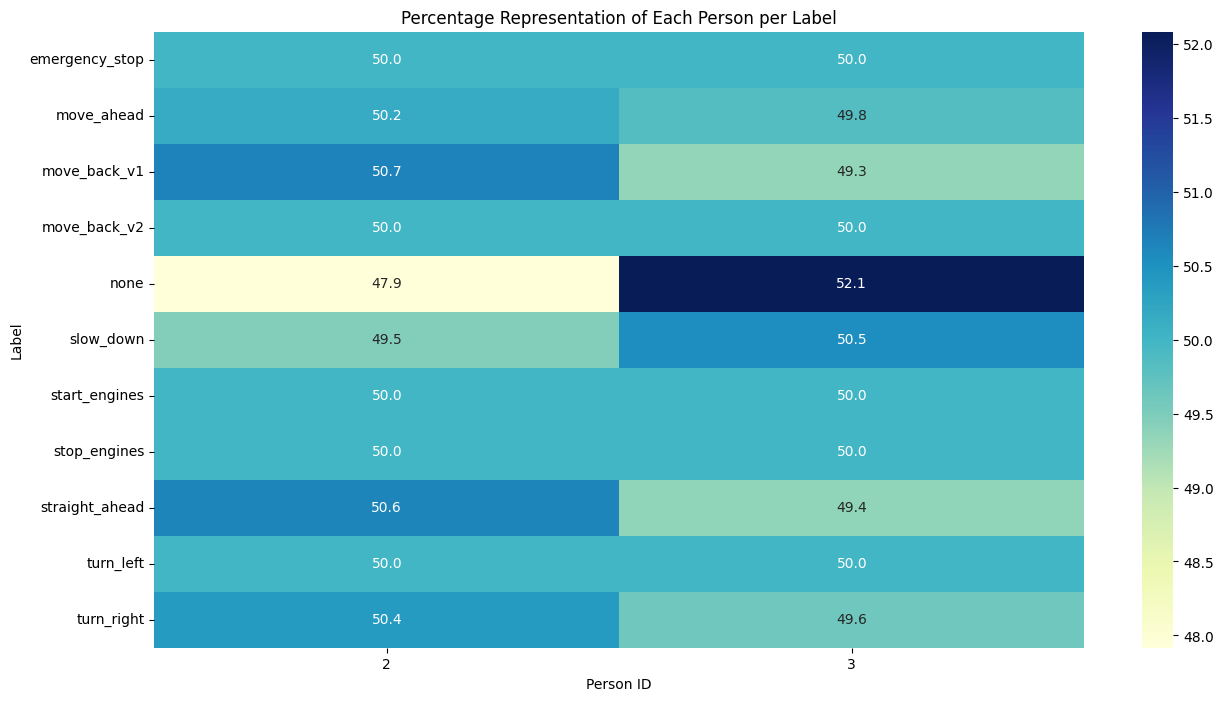

In [26]:
selected_perons = ['2','3']
df_without_rest = df[df['person_ids'].isin(selected_perons)]
selected_perons = ['0', '4', '5', '6', '7']
df_rest_only = df[df['person_ids'].isin(selected_perons)]

# Calculate the percentage representation of each person per label
person_label_percentage = df_without_rest.groupby('labels')['person_ids'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting the percentage representation
plt.figure(figsize=(15, 8))
sns.heatmap(person_label_percentage, annot=True, cmap="YlGnBu", fmt=".1f")
plt.xlabel("Person ID")
plt.ylabel("Label")
plt.yticks(rotation=0)  # to keep the labels upright
plt.title("Percentage Representation of Each Person per Label")
plt.savefig('./percentage_each_person_per_label.png')
plt.show()


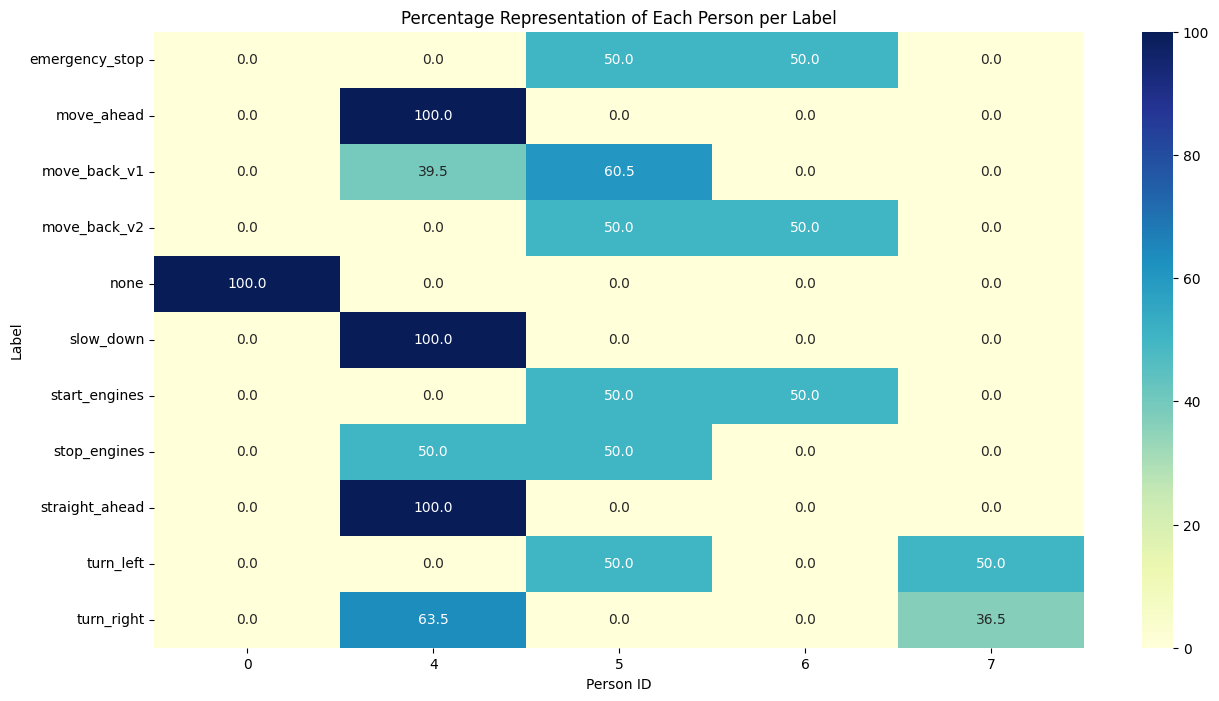

label sum without rest labels
emergency_stop    720
start_engines     720
move_back_v2      720
turn_left         720
stop_engines      720
move_back_v1      679
none              672
turn_right        659
move_ahead        654
slow_down         645
straight_ahead    624
Name: count, dtype: int64
label sum with rest labels
straight_ahead    336
slow_down         315
move_ahead        306
turn_right        301
none              288
move_back_v1      281
emergency_stop    240
start_engines     240
move_back_v2      240
stop_engines      240
turn_left         240
Name: count, dtype: int64


In [27]:
# Calculate the percentage representation of each person per label
person_label_percentage = df_rest_only.groupby('labels')['person_ids'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting the percentage representation
plt.figure(figsize=(15, 8))
sns.heatmap(person_label_percentage, annot=True, cmap="YlGnBu", fmt=".1f")
plt.xlabel("Person ID")
plt.ylabel("Label")
plt.yticks(rotation=0)  # to keep the labels upright
plt.title("Percentage Representation of Each Person per Label")
plt.savefig('./percentage_each_person_per_label.png')
plt.show()

print("label sum without rest",df_without_rest['labels'].value_counts())
print("label sum with rest",df_rest_only['labels'].value_counts())